In [3]:
# dependencies
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# Linear regression

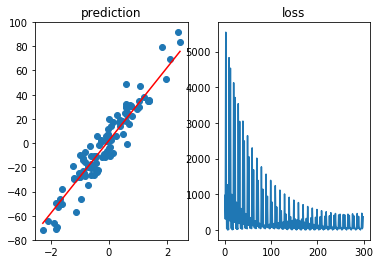

In [55]:
# generate dataset
X, Y = datasets.make_regression(n_samples=100, n_features=1, noise=10, bias=2)

# trainable variables
w = np.random.randn(1).reshape(1,-1)
b = [0]

# hyper params
alpha = 0.001

i = 0
losses = []
# Perform Gradient Descent
for _ in range(3000):
    train_x, train_y = X[i], Y[i]
    
    # forward prop
    y_pred = np.dot(train_x,w) + b
    
    # backward prop
    dl = -1 * (train_y - y_pred)
    dw = np.dot(train_x,dl)
    db = dl
    
    new_w = w - alpha * dw
    new_b = b - alpha * db
    
    i = (i + 1) % len(X)
    w = new_w
    b = new_b
    
    if i % 10 == 0:
        loss = np.mean((train_y - y_pred)**2)
        losses.append(loss)

plt.figure(1)

# plot data
plt.subplot(121)
plt.title('prediction')
plt.scatter(X,Y)

# plot trained model regression line
xs = np.linspace(min(X), max(X), 1000).reshape(-1, X.shape[1])
ys = np.dot(xs,w) + b
plt.plot(xs,ys, color='red')

plt.subplot(122)
plt.title('loss')
plt.plot(losses)
plt.show()

# Logistic regression

(2, 1)


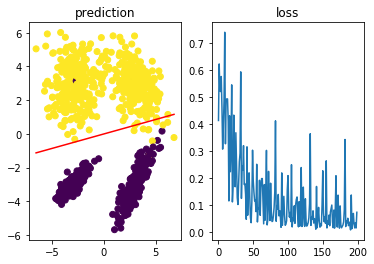

In [144]:
# generate dataset
X, Y = datasets.make_classification(n_samples=1000, n_features=2,n_informative=2, n_redundant=0, n_classes=2, class_sep=3)
Y = Y.reshape(-1,1)

# trainable variables
w = np.random.randn(2).reshape(-1,1)
b = [0]

# hyperparameters
alpha = 0.001
BATCH_SIZE = 20

# activation function
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# Perform Gradient Descent
i = 0
losses = []
for _ in range(200):
    train_x, train_y = X[i:i+BATCH_SIZE], Y[i:i+BATCH_SIZE]
    
    # forward prop
    y_pred = sigmoid(np.dot(train_x,w) + b)
    
    # backprop
    dl = (y_pred - train_y)
    dw = np.dot(train_x.T, dl)
    db = np.mean(dl, axis=0)
    
    new_w = w - alpha * dw
    new_b = b - alpha * db
    
    w = new_w
    b = new_b
    i = (i + BATCH_SIZE) % len(X)
    
    # logistic cross-entropy error
    loss = -1 * np.mean(train_y * np.log(y_pred) + (1 - train_y) * np.log(1 - y_pred))
    losses.append(loss)
    
plt.figure(1)

# plot data
plt.subplot(121)
plt.title('prediction')
plt.scatter(X[:,0],X[:,1], c=Y)

# plot trained model regression line
xs = np.linspace(min(X[:,0]), max(X[:,0]), 1000)
print(w.shape)
ys = -(w[0]/w[1])*xs - b/w[1]
plt.plot(xs,ys, color='red')

plt.subplot(122)
plt.title('loss')
plt.plot(losses)
plt.show()